# Numerical Methods 01: Humble Beginnings [Code]

## Gabriel M Steward

### January 2023

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

[Problem 1](#P1) (The one with really big numbers)

[Problem 2](#P2) (The one that looks like it's shouting)

[Problem 3](#P3) (The one that's too clever for its own good)

[Problem 4](#P4) (Obseravtions)

<a id='P1'></a>

# Problem 1 \[Back to [top](#toc)\]
$$\label{P1}$$

C-Code:

```
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <stdbool.h>
#include <time.h> 

int main() {
    double pi = 3.14159265358979323846264338327950288;
    //this is definitely more than double precision but it should work up to 1e-15. 

    double estimate = 0; 

    for (int n = 0; n <= 1000000; ++n) {
        estimate = estimate + 4.0* (pow(-1.0,(double)n))/(2.0*n + 1.0);
        if ((n % 100000 == 0 && n != 0) || n == 100) {
            printf("%i, %15.14e, %15.14e\n",n, estimate, log10(sqrt(pow((pi - estimate)/(pi),2))));
        }
    }

    return 0;
}
```

Python Code:

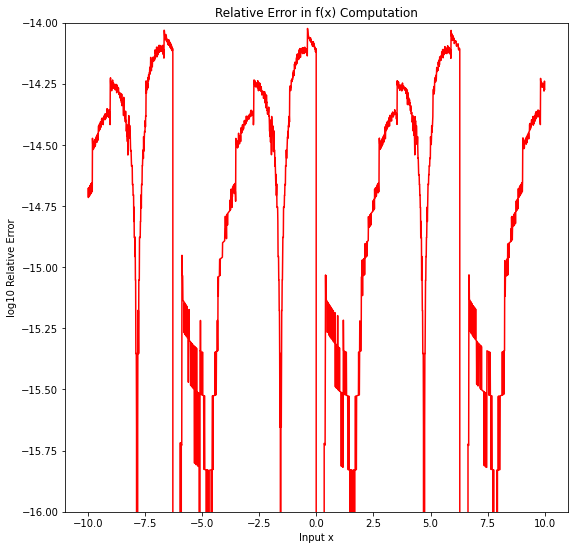

In [11]:
#plotting code borrowed from my ODESolver. 
import matplotlib.pyplot as plt

positionList = []
calculatedList = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
with open("ResultA.txt") as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList.append(float(row[4]))

fig, ax = plt.subplots()
ax.set_xlabel('Input x')
ax.set_ylabel('log10 Relative Error')
ax.set_title('Relative Error in f(x) Computation')
ax.plot(positionList, calculatedList, color='r') 
ax.set_ylim(-16,-14)
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)

<a id='P2'></a>

# Problem 2 \[Back to [top](#toc)\]
$$\label{P2}$$

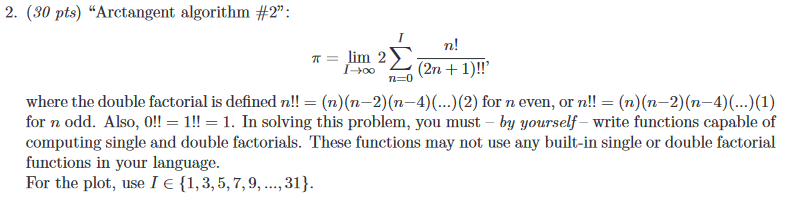

C-Code:

```
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <stdbool.h>
#include <time.h> 

double factorial(double n) {
    //Ugly factorial function. 
    //takes in doubles not ints to support arbitrarily huge things.
    //Does not perform any checks or do anything to maximize efficiency.
    double result = n;
    if (n == 0.0) {
        result = 1;
    } else {
        while (n > 1) {
            result = result*(n-1.0);

            n--;
        }
    }

    return result;
}

double factorial2(double n) {
    //Ugly double factorial function, as declared in problem statement. 
    //Notably, the number we plug into here is always odd so we don't even need to program in
    //an evenness or oddness checker. 
    double result = (double)n;
    if (n == 0) {
        result = 1;
    } else {
        while (n > 2) {
            result = result*((double)n-2.0);
            n = n-2;
        }
    }

    return result;
}

int main() {

    FILE *fp;
    fp = fopen("Result.txt","w");
    //Get ourselves a file.

    double pi = 3.14159265358979323846264338327950288;
    //this is definitely more than double precision but it should work up to 1e-15. 

    double estimate = 0; 

    for (int n = 0; n <= 31; ++n) {
        estimate = estimate + 2.0* factorial((double)n)/(factorial2(2.0*(double)n+1.0));
        if (n%2 == 1) {
            //This here tells us when we've hit an n value that we want to print. 
            fprintf(fp, "%i, %15.14e, %15.14e,\n",n, estimate, log10(sqrt(pow((pi - estimate)/(pi),2))));
            //Note: taking a logarithm of a value less than one makes it negative. 
        }
    }

    fclose(fp);
    //Close yer files!

    return 0;
}
```

And then we plot the results in Python.

In [10]:
#plotting code borrowed from my ODESolver. 
import matplotlib.pyplot as plt

positionList = []
calculatedList = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
with open("Results2.txt") as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList.append(float(row[2]))

fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Log10 Relative Error')
ax.set_title('Method 2: Arctangent Algorithm II')
ax.plot(positionList, calculatedList, color='r') 
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)

<a id='P3'></a>

# Problem 3 \[Back to [top](#toc)\]
$$\label{P3}$$

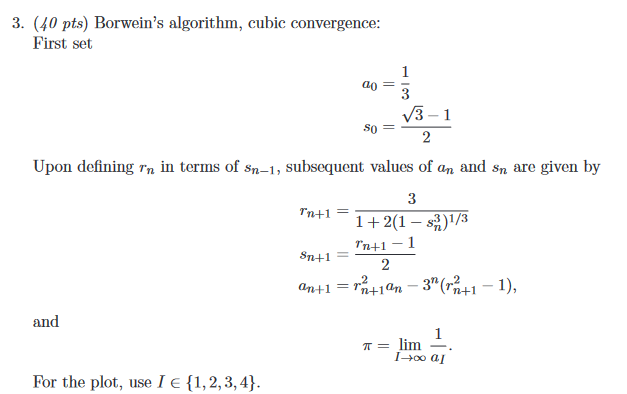

C-Code

```
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <stdbool.h>
#include <time.h> 

int main() {

    FILE *fp;
    fp = fopen("Result.txt","w");
    //Get ourselves a file.

    double pi = 3.14159265358979323846264338327950288;
    //this is definitely more than double precision but it should work up to 1e-15. 

    double estimate = 0;
    double a1 = 1.0/3.0;
    double s1 = (sqrt(3.0) - 1.0)/2.0; 
    double a2, s2, r; //we need two of each variable to properly have a buffer. 
    //except r. r doesn't care what it was yetserday. 

    for (int n = 1; n <= 4; ++n) {
        r = 3.0 / (1.0 + 2.0 * pow(1-pow(s1,3.0),1.0/3.0));
        s2 = (r - 1.0)/2.0;
        a2 = pow(r,2.0) * a1 - pow(3.0,n-1.0) * (pow(r,2.0) - 1.0);

        estimate = 1/a2;
        if (n>-1) {
            //This here tells us when we've hit an n value that we want to print. 
            fprintf(fp, "%i, %15.14e, %15.14e,\n",n, estimate, log10(sqrt(pow((pi - estimate)/(pi),2))));
            //Note: taking a logarithm of a value less than one makes it negative. 
        }

        a1 = a2;
        s1 = s2;
        //and r doesn't care. 
    }

    fclose(fp);
    //Close yer files!

    return 0;
}
```

Python:

In [9]:
#plotting code borrowed from my ODESolver. 
import matplotlib.pyplot as plt

positionList = []
calculatedList = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
with open("Results3.txt") as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList.append(float(row[2]))

fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Log10 Relative Error')
ax.set_title('Method 3: Browein\'s Algorithm')
ax.plot(positionList, calculatedList, color='r') 
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)

<a id='P4'></a>

# Problem 4 \[Back to [top](#toc)\]
$$\label{P4}$$

No code for this one. 